<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience2/blob/main/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [ ]:
# Download data
!gdown --id 1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vZaPbRhfel2Y1uD5U0vi0zjCu58yYvS_
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 14.2MB/s]


In [ ]:
# read csv file
df = pd.read_csv("Iris.csv")

In [ ]:
# Check how data looks
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
91,92,6.1,3.0,4.6,1.4,Iris-versicolor


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Change the target to categorical
target = df["Species"].astype("category")

In [ ]:
type(target)

pandas.core.series.Series

In [ ]:
target = target.cat.codes

In [ ]:
# drop the extra columns
data = df.drop(columns=['Id', 'Species'], axis=1)

In [ ]:
# Check again the feature table
data.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

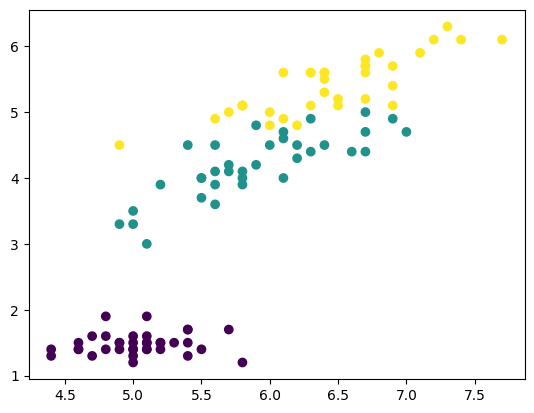

In [ ]:
# Plot a single look of the data's distribution with two features
plt.scatter(X_train["SepalLengthCm"], X_train['PetalLengthCm'], c=y_train.values)
plt.show()

In [ ]:
# define KKN fuction
def KNN(X_train, y_train, X_test, K=1):
  dist = np.linalg.norm(X_train.values - X_test, ord=2, axis=1)
  sorted_arg_dist = np.argsort(dist)
  y_nn = y_train.values[sorted_arg_dist[:K]]
  return mode(y_nn)[0]

In [ ]:
# Prediction phase
y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
  y_pred[i] = KNN(X_train, y_train, X_test.values[i], K=5)

In [ ]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# Applying built-in function / p is related Minkowsky metric
knn = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree", p=2)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [ ]:
y_pred2 = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
neighbors = np.arange(2, 11)
mindowsky = [1, 2, np.inf]
for j in mindowsky:
  print("\np is", j, "\n -------------------------------")
  for k in neighbors:
    knn_val = KNeighborsClassifier(n_neighbors=k, p=j)
    scores = cross_val_score(knn_val, X_train, y_train, cv=5, scoring="accuracy")
    print("for k =", k, "acc is", scores, "mean_acc is", scores.mean())


p is 1 
 -------------------------------
for k = 2 acc is [0.95238095 0.95238095 1.         0.9047619  0.9047619 ] mean_acc is 0.9428571428571428
for k = 3 acc is [1.         0.95238095 1.         0.85714286 1.        ] mean_acc is 0.961904761904762
for k = 4 acc is [0.95238095 0.95238095 1.         0.9047619  1.        ] mean_acc is 0.9619047619047618
for k = 5 acc is [0.95238095 0.95238095 1.         0.85714286 1.        ] mean_acc is 0.9523809523809523
for k = 6 acc is [0.95238095 0.95238095 1.         0.9047619  0.95238095] mean_acc is 0.9523809523809523
for k = 7 acc is [1.         0.95238095 1.         0.85714286 0.95238095] mean_acc is 0.9523809523809523
for k = 8 acc is [0.95238095 0.95238095 1.         0.9047619  0.95238095] mean_acc is 0.9523809523809523
for k = 9 acc is [1.         0.95238095 1.         0.9047619  0.95238095] mean_acc is 0.9619047619047618
for k = 10 acc is [1.         0.95238095 1.         0.95238095 0.95238095] mean_acc is 0.9714285714285715

p is 2 
 ---

In [ ]:
!gdown --id 1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Mso_Kr0tD2TSnfXfMeP0CNyNZqPK1drt
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 13.2MB/s]


In [ ]:
df = pd.read_csv("Advertising.csv")
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

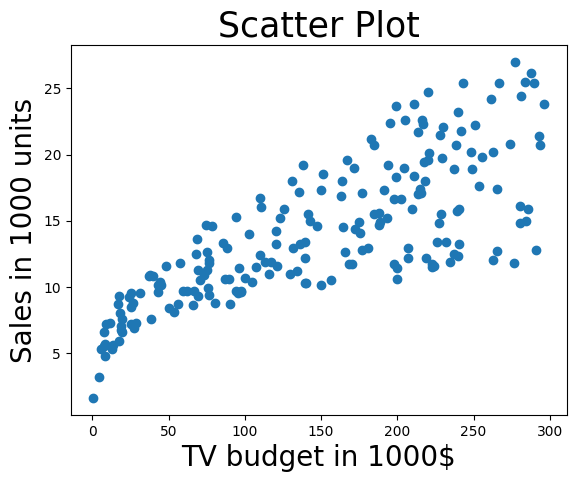

In [ ]:
# Select variables and draw a scatter plot
x = df[["TV"]].values # predictor
y = df[["Sales"]].values # response or output variable

plt.scatter(x, y)
plt.xlabel("TV budget in 1000$", fontsize=20)
plt.ylabel("Sales in 1000 units", fontsize=20)
plt.title("Scatter Plot", fontsize=25)
plt.show()

In [ ]:
# Split Data Set
x = df[["TV", "Radio", "Newspaper"]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Text(0.5, 1.0, 'ELBOW PLOT')

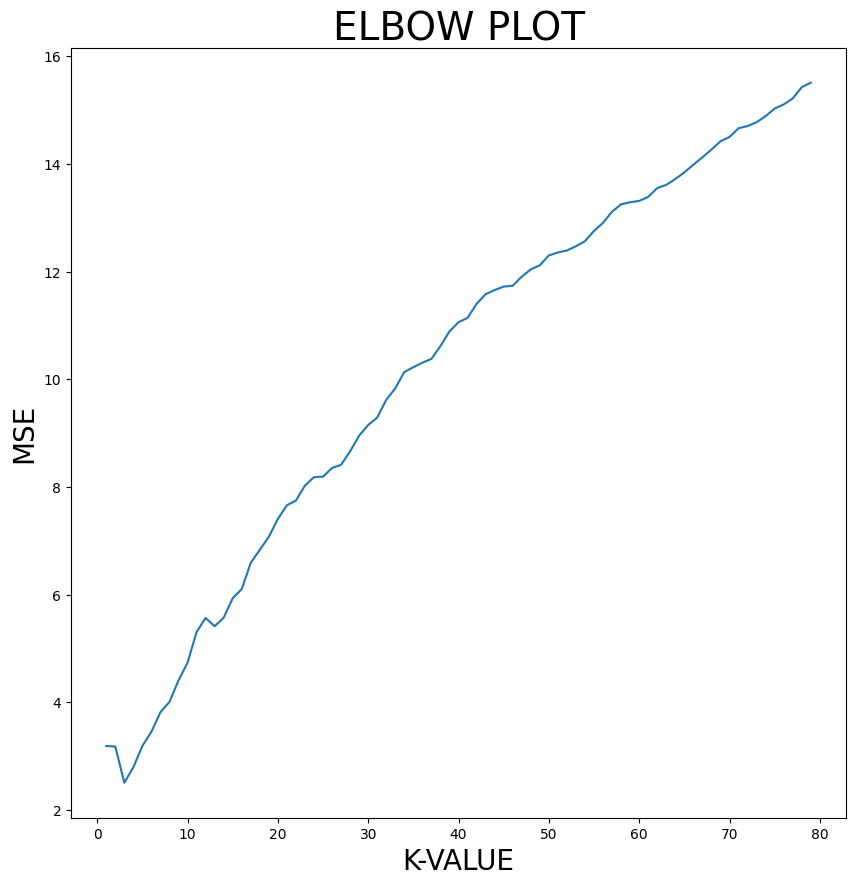

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
k_list = np.arange(1, 80, 1)
knn_dict = {} # To store k and mse pairs

for i in k_list:
# Knn Model Selection
  knn = KNeighborsRegressor(n_neighbors=int(i))
  model_knn = knn.fit(x_train, y_train)
  y_knn_pred = model_knn.predict(x_test)
# Storing MSE
  mse = mean_squared_error(y_test, y_knn_pred)
  knn_dict[i] = mse
# Plotting the results
ax.plot(np.array(list(knn_dict.keys())).astype(float), np.array(list(knn_dict.values())).astype(float))
ax.set_xlabel("K-VALUE", fontsize=20)
ax.set_ylabel("MSE", fontsize=20)
ax.set_title("ELBOW PLOT", fontsize=28)

In [ ]:
mean_squared_error(y_test, y_knn_pred)

15.508726592960524

In [ ]:
k = 3
knn = KNeighborsRegressor(n_neighbors=k)
model_knn = knn.fit(x_train, y_train)
y_knn_pred = model_knn.predict(x_test)

In [ ]:
r2_score(y_test, y_knn_pred)

0.9144750361269245